In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib as plt
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os

Script to process and examine results of approximate BW and Viterbi HMM fitting. 

In [2]:
#Set Paths
root = "../results"
folder = "truncated_bw_testing"
subfolder = "B_realistic_scenario"
test_name = "eve2_2state_full_gene_1496646705.26"

readpath = os.path.join(root,folder,subfolder,test_name)

### Example Plots
Fit traces generated using true parameters using estimated parameters

In [3]:
from utilities.functions import generate_traces_gill
from utilities.stack_decoder import decode_cp

#Basic Test Parameters
K = 2
dt = 10.2
#Read in true param values
true_params = pd.read_csv(os.path.join(readpath,"true_values.csv"),header=None)
R_true = np.reshape(true_params.iloc[0,:K**2],(K,K))
v_true = np.array(true_params.iloc[0,K**2:K**2 + K])
sigma_true = np.array(true_params.iloc[0,K**2 + 1])
pi = np.array(true_params.iloc[0,-K:])

#Read in best estimated param values
inf_params = pd.read_csv(os.path.join(readpath,"best_results.csv"),header=None)
R_inf = np.reshape(inf_params.iloc[0,:K**2],(K,K))
v_inf = np.array(inf_params.iloc[0,K**2:K**2 + K])
sigma_inf = np.array(inf_params.iloc[0,-K-1])

print("True Emission Rates: " + str(v_true))
print("")
print("Estimated Emission Rates: " + str(v_inf))
print("")
print("True Off/On Rates: " + "K_on = " + str(R_true[1,0]) + " K_off = " + str(R_true[0,1]))
print("")
print("Esimated Off/On Rates: " + "K_on = " + str(R_inf[1,0]) + " K_off = " + str(R_inf[0,1]))

True Emission Rates: [  0.  25.]

Estimated Emission Rates: [  0.68131718  25.38360072]

True Off/On Rates: K_on = 0.0408 K_off = 0.1428

Esimated Off/On Rates: K_on = 0.00394436732567 K_off = 0.0141980172347


##### Make Plots

In [23]:
import time
start_time = time.time()
n_traces = 10
trace_length = 200
stack_depth = 50
w = 15
#Generate Traces 
promoter_states, fluo_states, promoter_states_discrete, fluo_states_nn = \
        generate_traces_gill(w, trace_length, n_traces, r_mat=R_true, v=v_true, noise_level=0.1, alpha=3.0, pi0=pi)

#Decode
seq_out, f_out, v_out, logL_out = decode_cp(fluo_states, np.log(sp.linalg.expm(R_inf*dt)), np.log(pi), v_inf, w, \
                                            0.1, stack_depth=stack_depth, alpha=3.0)
    
plotpath = os.path.join(readpath, 'trace_plots')
if not os.path.isdir(plotpath):
    os.makedirs(plotpath)
for tr in xrange(n_traces):
    fig_fluo = plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 1, 1)
    ax.plot(fluo_states[tr], c='g', alpha=0.4, label='Actual')
    ax.plot(f_out[tr], c='b', label='Predicted')

    # plt.legend()
    fig_fluo.savefig(os.path.join(plotpath, 'tr' + "_" + str(tr) + "_fluo.png"))
    plt.close()

    fig_prom = plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 1, 1)
    ax.plot(promoter_states[tr], c='g', alpha=0.4, label='Actual')
    ax.plot(v_out[tr], c='b', label='Predicted')
    plt.ylim([0, 1.1 * np.max(v_true)])
    # plt.legend()
    fig_prom.savefig(os.path.join(plotpath, 'tr' + "_" + str(tr) + "_promoter.png"))
    plt.close()
print("Done: " + str(time.time()-start_time) + "s")

Done: 13.3740000725s


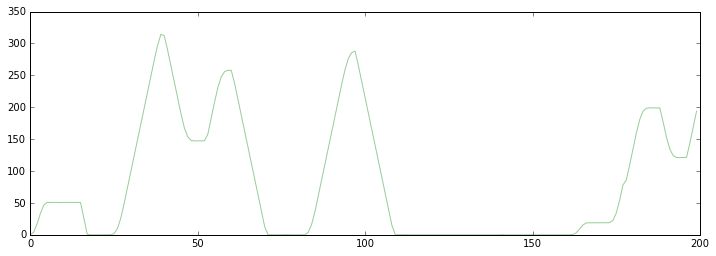

In [25]:
tr = 1
fig_fluo = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(fluo_states[tr], c='g', alpha=0.4, label='Actual')
ax.plot(f_out[tr], c='b', label='Predicted')
plt.show()

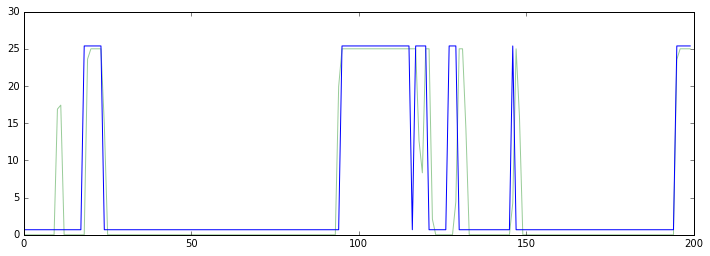

In [20]:
tr = 3
fig_fluo = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(promoter_states[tr], c='g', alpha=0.4, label='Actual')
ax.plot(v_out[tr], c='b', label='Predicted')
plt.show()